# Application of Boostrapping in Image Classification:
Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score

Loading MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

simple model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2593 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1135 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0783 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0451 - accuracy: 0.9858


sample size for clt demo

In [ ]:
sample_size = 1000

bootstrap sample to calculate model accuracy

In [ ]:
def get_bootstrap_accuracy(model, x_test, y_test, sample_size):
    sample_indices = np.random.choice(len(x_test), size=sample_size, replace=True)
    sample_x = x_test[sample_indices]
    sample_y = y_test[sample_indices]
    sample_y_pred = np.argmax(model.predict(sample_x), axis=1)
    return accuracy_score(sample_y, sample_y_pred)

bootstrap and plot

32/32 [==============================] - 0s 2ms/step


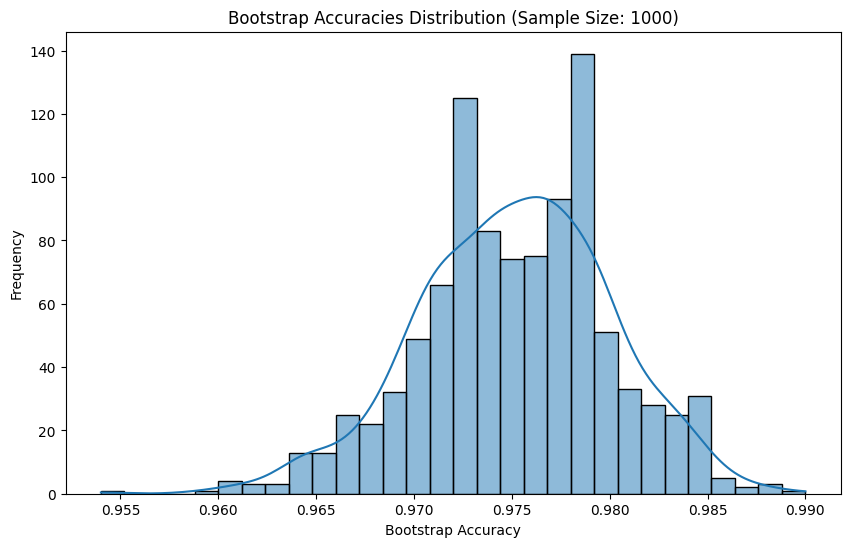

In [ ]:
n_bootstrap_samples = 1000
bootstrap_accuracies = [get_bootstrap_accuracy(model, x_test, y_test, sample_size) for _ in range(n_bootstrap_samples)]

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_accuracies, kde=True, bins=30)
plt.xlabel('Bootstrap Accuracy')
plt.ylabel('Frequency')
plt.title('Bootstrap Accuracies Distribution (Sample Size: {})'.format(sample_size))
plt.show()